1.. Find the census trck shape files online (American Fact Finder has them), http://www1.nyc.gov/ has them. The folder you should download is names nycb2010_16d. 
Load it as a geopandas file

In [1]:
import os
import pandas as pd
import numpy as np
import shapely
import matplotlib.pylab as plt

from geopandas import GeoDataFrame
from fiona.crs import from_epsg

import Download_Code
#Getting my code to download the file directly from the Net

%matplotlib inline

In [2]:
Download_Code.getcode()

Folder with required files in PUIdata, you can continue


In [3]:
shape_path = os.getenv('PUIDATA') +'/'+ "nycb2010_16d/nycb2010.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.to_crs(epsg=4326, inplace=True)

In [4]:
ct_shape_brooklyn = ct_shape[ct_shape.BoroName == 'Brooklyn']
ct_shape_brooklyn.reset_index(inplace=True)
ct_shape_brooklyn.drop('index', axis=1, inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [5]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((-74.07920577013249 40.643430783779, ..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,POLYGON ((-74.07061992438021 40.61085506708748...
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910647 40.62600632456045...
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((-74.0870879968983 40.61116883127258,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,POLYGON ((-74.07643744511995 40.60100160658919...


2.. Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon 

In [6]:
ct_shape_brooklyn.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,"POLYGON ((-74.00659158337982 40.6556127336851,..."
1,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384570529...
2,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((-73.99270830309769 40.6980992598468,..."
3,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.9851430608965 40.69488514300315,..."
4,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793357372...


In [7]:
ct_shape_brooklyn['geometry']

0       POLYGON ((-74.00659158337982 40.6556127336851,...
1       POLYGON ((-73.99514512602698 40.69877384570529...
2       POLYGON ((-73.99270830309769 40.6980992598468,...
3       POLYGON ((-73.9851430608965 40.69488514300315,...
4       POLYGON ((-73.98305147125492 40.69837793357372...
5       POLYGON ((-74.01298705619368 40.64945600088912...
6       POLYGON ((-74.01925526318797 40.64685276173368...
7       POLYGON ((-74.02626267406126 40.64009438137105...
8       POLYGON ((-73.97782679465359 40.69343813943177...
9       POLYGON ((-73.97510566428163 40.68969750920951...
10      POLYGON ((-73.97551988364874 40.68675683612325...
11      POLYGON ((-73.98092822918811 40.68890247780964...
12      POLYGON ((-74.03231651986361 40.63479116052847...
13      POLYGON ((-73.98181677514268 40.6873298022958,...
14      POLYGON ((-73.98872146849779 40.68924580851749...
15      POLYGON ((-74.03315548281148 40.63273497325626...
16      POLYGON ((-73.99236367043247 40.6896901238103,...
17      POLYGO

3.. Find the coordinates of CUSP: 1 MetroTech Brooklyn. Create a Point shapely geometry with the coordinates of CUSP

    shapely.geometry.Point()

In [8]:
cusp = shapely.geometry.Point(-73.9866, 40.6931)

4.. Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained

In [9]:
for i in range(len(ct_shape_brooklyn)):
    if not ct_shape_brooklyn.geometry[i].contains(cusp): continue
    else: break

cusp_index = i        
print ('CUSP is contained in {}'.format(ct_shape_brooklyn.geometry[cusp_index]))

CUSP is contained in POLYGON ((-73.98622595691906 40.69308831343839, -73.98627231669103 40.6921947946671, -73.98729894947923 40.69223407543156, -73.98725396415627 40.69312490276504, -73.98622595691906 40.69308831343839))


5.. Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot)
and overplot the locati`on of cusp as a point (using pylab.scatter)
Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

In [10]:
cusp_ct = GeoDataFrame(ct_shape_brooklyn.iloc[cusp_index,:])

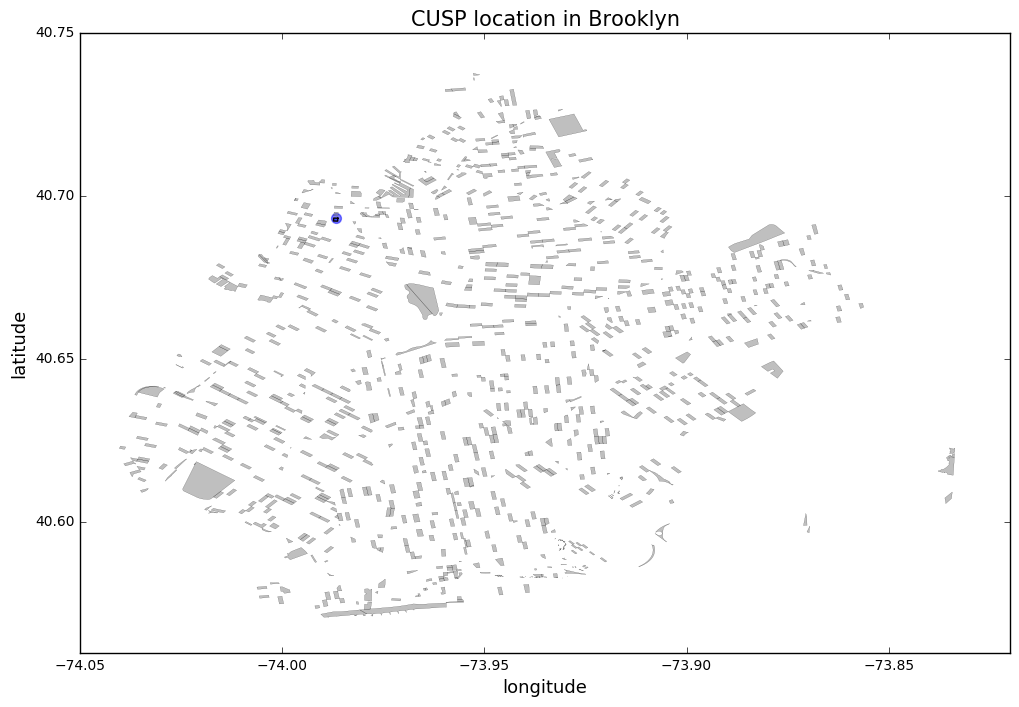

In [11]:
fig, ax = plt.subplots(1, figsize = (12,8))
ct_shape_brooklyn[::10].plot(ax=ax, color = 'grey', linewidth=0.1)
cusp_ct.T.plot(ax=ax, color = 'blue')
plt.scatter(cusp.x, cusp.y, color = 'blue', s =50, alpha= 0.5)
plt.xlim(-74.05, -73.82)
plt.ylim(40.56, 40.75)
plt.xlabel('longitude', fontsize = 13)
plt.ylabel('latitude', fontsize = 13)
plt.title('CUSP location in Brooklyn', fontsize = 15)
plt.show()